# PROYEK DATA ANALIS - BIKE SHARING

* Nama : Fuad Hidayat Ardiansya
* Email: f.h.ardiansya@gmail.com

# Menentukan Pertanyaan Bisnis

In [1]:
#1.Bagaimana intensitas jumlah sewa sepeda harian setiap musim(season)?
#2.Bagaimana intensitas jumlah sewa sepeda harian setiap tahun(year)?
#3.Bagaimana intensitas jumlah sewa sepeda harian setiap bulan(month)?
#4.Bagaimana dampak cuaca(weathersit) terhadap jumlah sewa sepeda harian?
#5.Bagaimana perbedaan jumlah sepeda harian antara hari kerja(workingday) dan hari libur(holiday)?

In [2]:
#Menyiapkn Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Data Wrangling

## Gathering Data 

In [3]:
#Membaca dataset
days_df = pd.read_csv("https://raw.githubusercontent.com/fuadardiansya/myproject/main/bike-sharing/day.csv")
#Menampilkan dataset
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/fuadardiansya/myproject/main/bike-sharing/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#Menghitung jumlah dataframe
print("Jumlah dataframe day:", days_df.shape[0])
print("Jumlah dataframe hour:", hours_df.shape[0])

Jumlah dataframe day: 731
Jumlah dataframe hour: 17379


In [6]:
#Mengabungkan dataframe
days_hours_df = days_df.merge(hours_df, on='dteday', how='inner', suffixes=('_daily','_hourly'))
print(days_hours_df.shape)
#Menampilkan hasil penggabungan dataframe
days_hours_df.loc[days_hours_df["dteday"].isnull()]
days_hours_df.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

In [7]:
#Memeriksa dataframe days_df
days_df.info()
#Memeriksa dataframe hours_df
hours_df.info()
#Memeriksa dataframe days_hours_df
days_hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [8]:
#Memeriksa jumlah missing values days_df
days_df.isna().sum()
#Memeriksa jumlah missing values hours_df
hours_df.isna().sum()
#Memeriksa jumlah missing values days_hours_df
days_hours_df.isna().sum()

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

In [9]:
print("Jumlah duplikat: ", days_df.duplicated().sum())
print("Jumlah duplikat: ", hours_df.duplicated().sum())
print("Jumlah duplikat: ", days_hours_df.duplicated().sum())

Jumlah duplikat:  0
Jumlah duplikat:  0
Jumlah duplikat:  0


In [10]:
#Menampilkan ringkasan dataframe days_df
days_df.describe()
#Menampilkan ringkasan dataframe hours_df
hours_df.describe()
#Menampilkan ringkasan dataframe days_hours_df
days_hours_df.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data 

In [11]:
#Tidak terdapat data duplikat dan missing value

# Exploratory Data Analysis

In [12]:
#Mendefinisikan fungsi yang akan digunakan
def range(series):
    return series.max() - series.min()

In [13]:
days_hours_df.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [14]:
days_hours_df.groupby(by="season_hourly").agg({
    "workingday_hourly": "count", #Menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()] #Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
3                          4496           0.8507  0.0  0.171593     0.8507
2                          4409           0.7164  0.0  0.203410     0.7164
1                          4242           0.8060  0.0  0.215107     0.8060
4                          4232           0.6418  0.0  0.170819     0.6418

In [15]:
days_hours_df.groupby(by="season_daily").agg({
    "workingday_hourly": "count", #Menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()] #Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

workingday_hourly windspeed_hourly                          
                         count              max  min      mean <lambda_0>
season_daily                                                             
3                         4496           0.8507  0.0  0.171593     0.8507
2                         4409           0.7164  0.0  0.203410     0.7164
1                         4242           0.8060  0.0  0.215107     0.8060
4                         4232           0.6418  0.0  0.170819     0.6418

In [16]:
days_hours_df.groupby(by="season_daily").mnth_daily.nunique().sort_values(ascending=False)

season_daily
1    4
2    4
3    4
4    4
Name: mnth_daily, dtype: int64

In [17]:
days_hours_df.groupby(by="season_daily").instant_daily.nunique().sort_values(ascending=False)

season_daily
3    188
2    184
1    181
4    178
Name: instant_daily, dtype: int64

In [18]:
days_hours_df.groupby(by="season_daily").cnt_daily.nunique().sort_values(ascending=False)

season_daily
3    188
2    182
1    179
4    176
Name: cnt_daily, dtype: int64

In [19]:
days_hours_df.groupby(by="season_daily").cnt_hourly.nunique().sort_values(ascending=False)

season_daily
3    760
2    721
4    690
1    482
Name: cnt_hourly, dtype: int64

In [20]:
days_hours_df.groupby(by="weathersit_daily").cnt_daily.nunique().sort_values(ascending=False)

weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64

In [21]:
days_hours_df.groupby(by="weathersit_daily").cnt_hourly.nunique().sort_values(ascending=False)

weathersit_daily
1    841
2    686
3    187
Name: cnt_hourly, dtype: int64

In [22]:
days_hours_df.groupby(by="mnth_daily").cnt_daily.nunique().sort_values(ascending=False)

mnth_daily
1     62
5     62
7     62
8     62
10    62
12    62
3     60
4     60
6     60
9     60
11    60
2     57
Name: cnt_daily, dtype: int64

In [23]:
days_hours_df.groupby(by="mnth_daily").cnt_hourly.nunique().sort_values(ascending=False)

mnth_daily
8     560
6     558
9     557
5     551
7     551
10    535
4     502
11    480
3     440
12    428
2     343
1     314
Name: cnt_hourly, dtype: int64

In [24]:
#Mencari Value Korelasi Setiap Data perhari
numerical_columns = ["holiday_daily","weekday_daily","workingday_daily","weathersit_daily","temp_daily","atemp_daily","season_daily", "windspeed_daily",  "cnt_daily"]
correlation = days_hours_df[numerical_columns].corr()
print(correlation)

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
weekday_daily             0.035082   -0.001894    -0.009333     -0.002335   
workingday_daily          0.057122    0.058460     0.057839      0.013743   
weathersit_

# Visualization & Explanatory Analysis

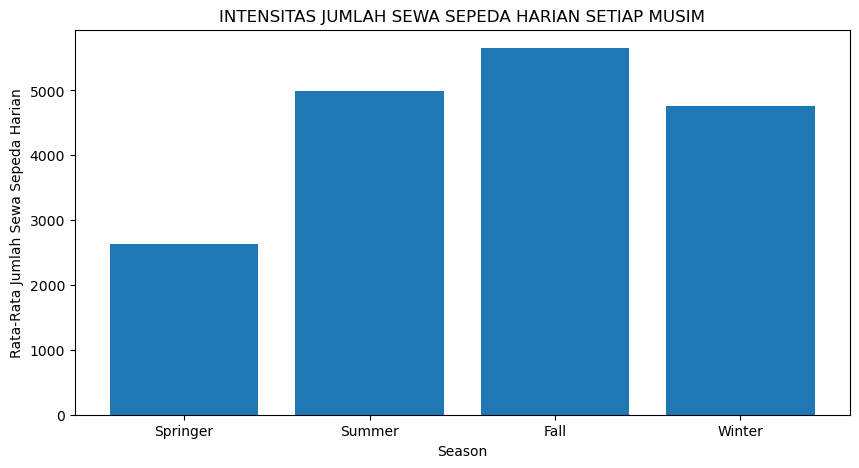

In [33]:
#1.Bagaimana intensitas jumlah sewa sepeda harian setiap musim(season)?

st.header('Dashboard Proyek Data Analysis Bike Sharing')
st.subheader('Check this out')

data_musimku = days_hours_df.groupby("season_daily")["cnt_daily"].mean()
jenis_musim = ["Springer","Summer","Fall", "Winter"]
plt.figure(figsize=(10, 5))
plt.bar(jenis_musim, data_musimku)
plt.title("INTENSITAS JUMLAH SEWA SEPEDA HARIAN SETIAP MUSIM")
plt.xlabel("Season")
plt.ylabel("Rata-Rata Jumlah Sewa Sepeda Harian")
plt.show()

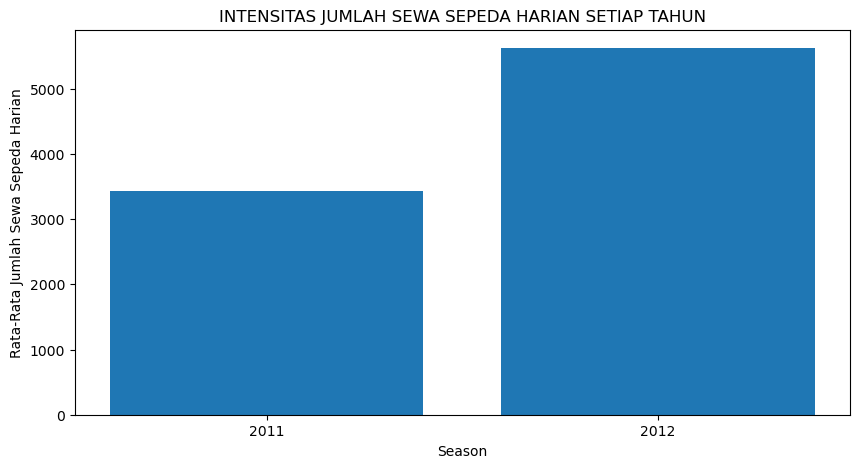

In [26]:
#2.Bagaimana intensitas jumlah sewa sepeda harian setiap tahun(year)?

data_tahunku = days_hours_df.groupby("yr_daily")["cnt_daily"].mean()
jenis_tahun = ["2011","2012"]
plt.figure(figsize=(10, 5))
plt.bar(jenis_tahun, data_tahunku)
plt.title("INTENSITAS JUMLAH SEWA SEPEDA HARIAN SETIAP TAHUN")
plt.xlabel("Season")
plt.ylabel("Rata-Rata Jumlah Sewa Sepeda Harian")
plt.show()

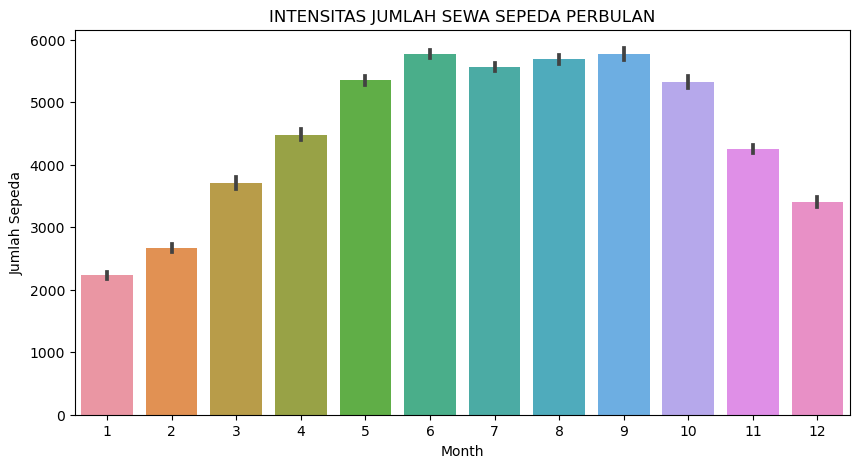

In [28]:
#3.Bagaimana intensitas jumlah sewa sepeda harian setiap bulan(month)?
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=days_hours_df, x="mnth_daily", y='cnt_daily', ax=ax)
ax.set(title='INTENSITAS JUMLAH SEWA SEPEDA PERBULAN')
plt.xlabel("Month")
plt.ylabel("Jumlah Sepeda")
plt.show()

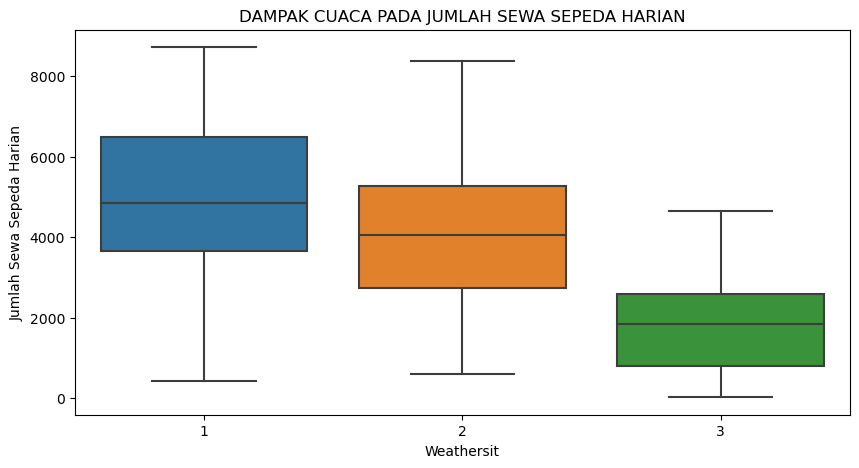

In [29]:
#4.Bagaimana dampak cuaca(weathersit) terhadap jumlah sewa sepeda harian?
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit_daily", y="cnt_daily", data=days_hours_df)
plt.title("DAMPAK CUACA PADA JUMLAH SEWA SEPEDA HARIAN")
plt.xlabel("Weathersit")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

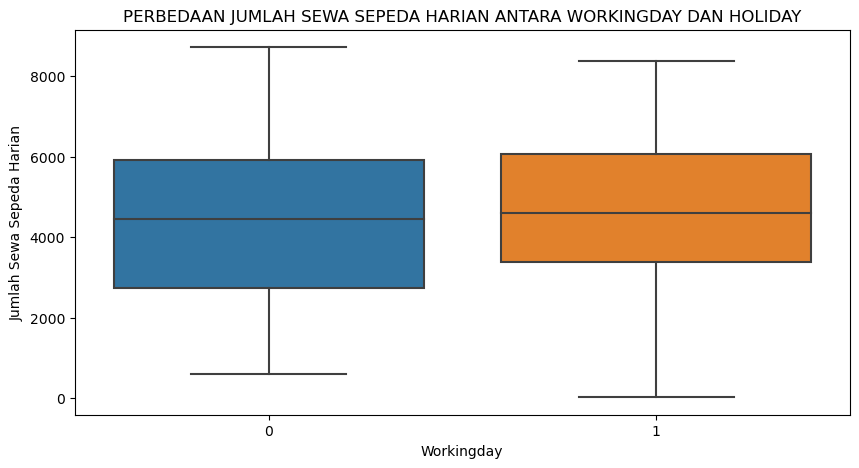

DeltaGenerator()

In [34]:
#5.Bagaimana perbedaan jumlah sepeda harian antara hari kerja(workingday) dan hari libur(holiday)?
plt.figure(figsize=(10, 5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=days_hours_df)
plt.title("PERBEDAAN JUMLAH SEWA SEPEDA HARIAN ANTARA WORKINGDAY DAN HOLIDAY")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

st.pyplot(fig)

st.caption('Copyright © Fuad Hidayat Ardiansya 2023')

# Conclusion

In [31]:


#1.Bagaimana intensitas jumlah sewa sepeda harian setiap musim(season)?
#Berdasarkan diagram bar diatas, rata-rata intensitas jumlah sewa sepeda harian paling tinggi dilakukan pada musim gugur (Fall) dan yang paling rendah dilakukan pada musim semi (Springer)

#2.Bagaimana intensitas jumlah sewa sepeda harian setiap tahun(year)?
#Berdasarkan diagram bar diatas, rata-rata intensitas jumlah sewa sepeda harian paling tinggi dilakukan pada tahun 2012

#3.Bagaimana intensitas jumlah sewa sepeda harian setiap bulan(month)?
#Berdasarkan diagram bar diatas, kondisi jumlah sewa sepeda pada bulan ke-6 dan ke-9 lebih banyak dibandingkan dengan bulan yang lainnya 

#4.Bagaimana dampak cuaca(weathersit) terhadap jumlah sewa sepeda harian?
#Berdasarkan diagram box plot diatas, jumlah sewa sepeda harian meningkat pada cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian

#5.Bagaimana perbedaan jumlah sepeda harian antara hari kerja(workingday) dan hari libur(holiday)?
#Berdasarkan diagram box plot diatas, jumlah sewa sepeda harian lebih banyak dilakukan pada workingday daripada holiday